In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [24]:
df = pd.read_csv('CH01PR28-crimerate.txt', sep='\s+', names=['Y', 'X'])
df

,Y,X
0,8487,74
1,8179,82
2,8362,81
3,8220,81
4,6246,87
...,...,...
79,7858,85
80,3632,91
81,8040,88
82,6981,83


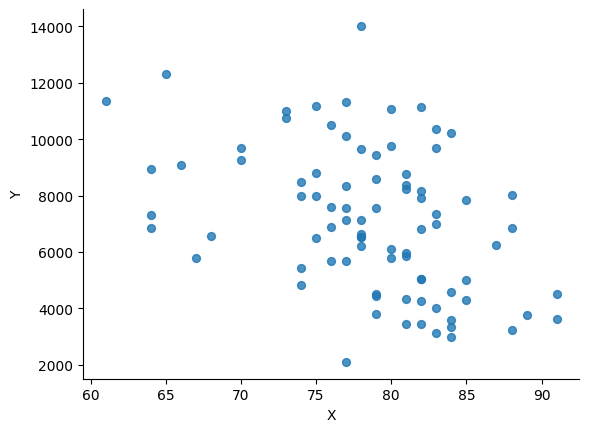

In [25]:
df.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
model = smf.ols('Y ~ X', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     16.83
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           9.57e-05
Time:                        14:03:40   Log-Likelihood:                -770.43
No. Observations:                  84   AIC:                             1545.
Df Residuals:                      82   BIC:                             1550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.052e+04   3277.643      6.260      0.0

1. Linear regression model

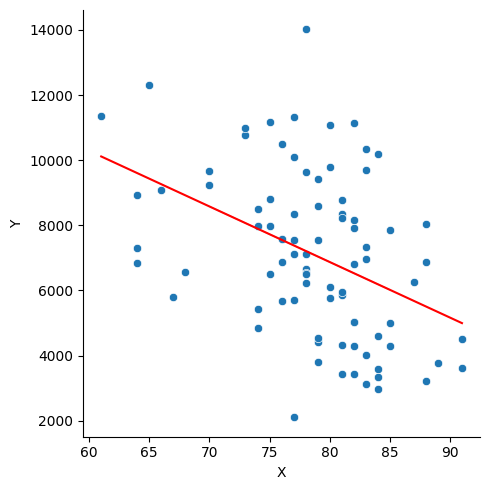

In [27]:
sns.relplot(x=df['X'], y=df['Y'], data=df)
sns.lineplot(x=df['X'], y=2.052e+04-170.5752*df['X'], color='red')
plt.show()

Linear regression is probably not a good fit here as there are many outliers

2. Obtain estimation

a. The difference in the mean crime rate for two counties whose high-school graduation rates differ by one percentage point is $$\beta1=170.5752$$

In [80]:
mean80 = 2.052e+04-170.5752*80
print("b.Mean of counties with high school graduation percentage X=80 is " + str(mean80))

b.Mean of counties with high school graduation percentage X=80 is 6873.984


In [81]:
#y = 2.052e+04-170.5752*np.mean(df['X'])
b1 = -170.5752
b0 = 2.052e+04
sse = sum((df['Y'] - (b0 + b1*df['X']))**2)
mse = sse/(len(df)-2)
print("c. MSE = sigma**2 = " + str(mse))

c. MSE = sigma**2 = 5552117.668227731


3. t-test
$$H0:\beta1=0$$
$$Ha:\beta1\neq0$$

In [60]:
s_b1 = np.sqrt(mse/sum((df['X']-np.mean(df['X']))**2))
t_star = b1/s_b1
print("t* = " + str(t_star))

t* = -4.1028951857061715


In [ ]:
n = len(df['X'])
t_val = stats.t.ppf(q = 0.995, df=n-2)
print("t = " + str(t_val))

t = 2.637123410420374


In [78]:
import scipy.stats as stats
p = 2*(stats.t.cdf(x = t_star, df = len(df['X'])-2))
p

9.571461149710038e-05

|t*| > t_val OR p_value > alpha => reject H0 and conclude Ha: $$Ha:\beta1\neq0$$

4. Confidence interval of $$\beta_1$$ with $$\alpha=0.01$$

In [76]:
L = b1 - t_val * s_b1
U = b1 + t_val * s_b1
print(L, U)

-280.2118913598635 -60.938508640136504


Confident interval for B1 with y_mean = 7111.202380952381 is (-280.2118913598635; -60.938508640136504)

5. Calculate SSE, MSE, SSR, SSTO

In [ ]:
ssr = sum(((b0 + b1*df['X']) - np.mean(df['Y']))**2)
ssto = sum((df['Y'] - np.mean(df['Y']))**2)
print ("SSE = " + str(sse))
print ("MSE = " + str(mse))
print ("SSTO = " + str(ssto))
print ("SSR = " + str(ssr))

SSE = 455273648.794674
MSE = 5552117.668227731
SST = 548736107.5595238
SSR = 93463438.21949297


6. Calculate the coefficient of determination and give conclusion

In [ ]:
coef_determination = ssr/ssto
print ("R^2 = " + str(coef_determination))

R^2 = 0.17032492837981247


The linear model is not suitable for the dataset

7. Perform F-test and give conclusion

In [73]:
F_star = (ssr/1)/(sse/(len(df)-2))
print("F* = " + str(F_star))

F* = 16.833835989165383


In [77]:
theshold = stats.f.ppf(q = 1-0.01, dfn=1, dfd = n-2)
p = 1- stats.f.cdf(x = F_star, dfn=1, dfd = n-2)
print(theshold,F_star, p)

6.9544198817871825 16.833835989165383 9.571097123162176e-05


F* > F_value => conclude Ha:
$$Ha:\beta1\neq0$$
The test statistic F* and decision rule consistent with the statistic in t-test